<a href="https://colab.research.google.com/github/Nithesh5/nithesh_shala_machine_learning/blob/master/Assignment2_Shala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


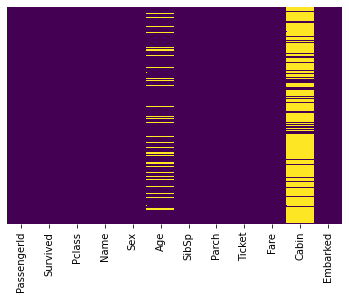

In [5]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d88999438>,
      dtype=object)

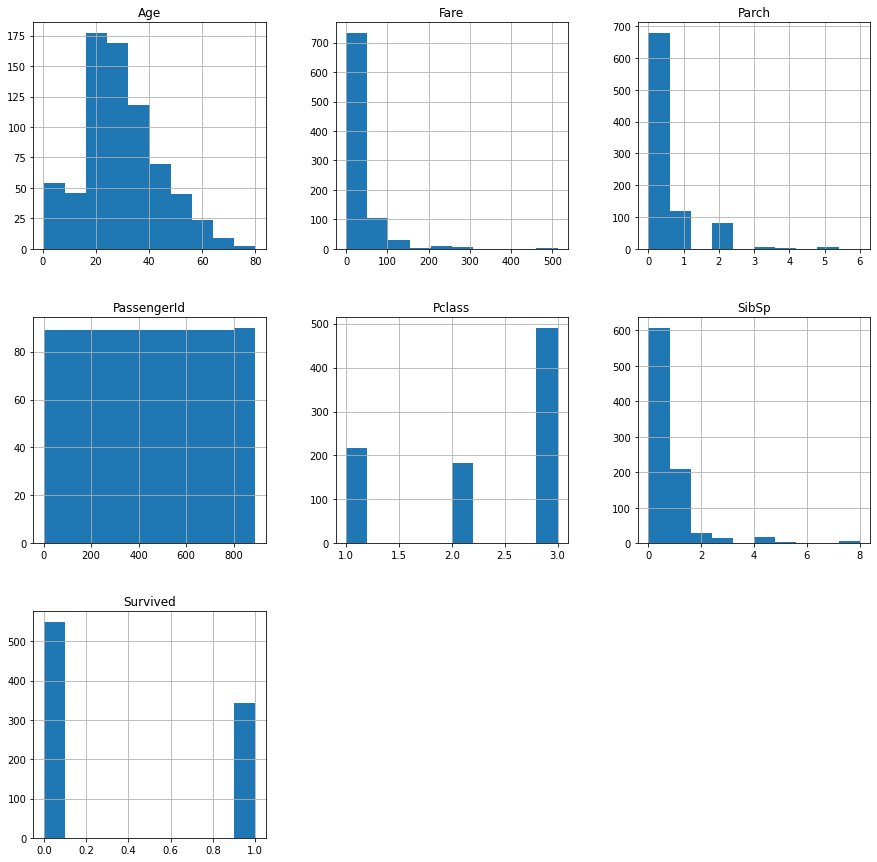

In [6]:
titanic_data.hist(figsize=(15,15))

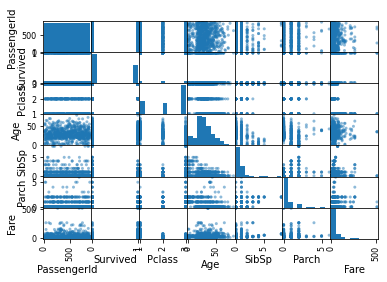

In [7]:
scatter_matrix(titanic_data)
plt.show()

In [0]:
# Removed Embarked NaN rows
titanic_data.dropna(axis=0, subset=['Embarked'],inplace=True)

In [0]:
# Removed Cabin column
titanic_data.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [10]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


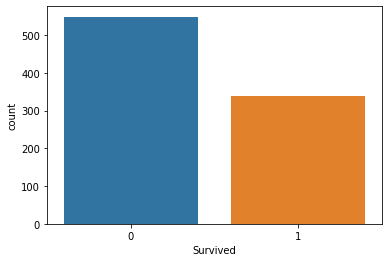

In [11]:
sns.countplot(x='Survived',data=titanic_data)

In [0]:
#filling na val of age with mean
#titanic_data['Age'].fillna((titanic_data['Age'].mean()), inplace=True)

In [13]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


Text(0, 0.5, 'Survived')

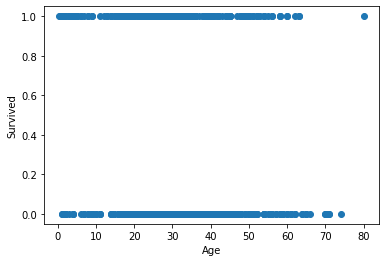

In [14]:
plt.scatter(titanic_data['Age'], titanic_data.Survived)
plt.xlabel('Age')
plt.ylabel('Survived')

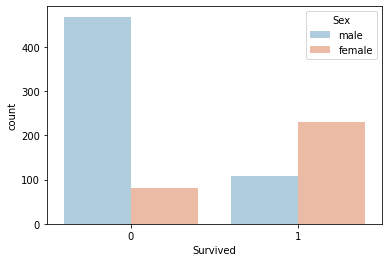

In [15]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data,palette='RdBu_r')

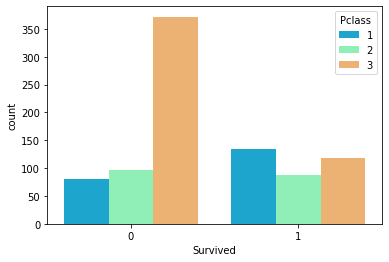

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data,palette='rainbow')

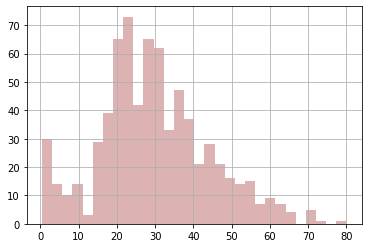

In [17]:
titanic_data['Age'].hist(bins=30,color='darkred',alpha=0.3)

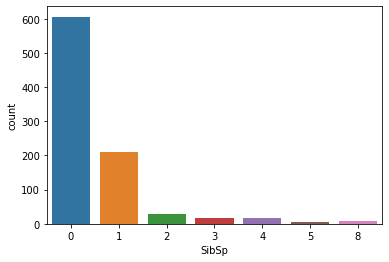

In [18]:
sns.countplot(x='SibSp',data=titanic_data)


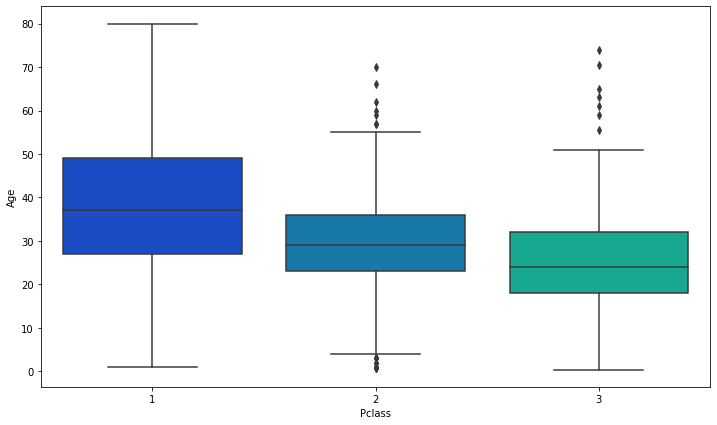

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')

In [0]:
def fill_age_na_val(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [0]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(fill_age_na_val,axis=1)

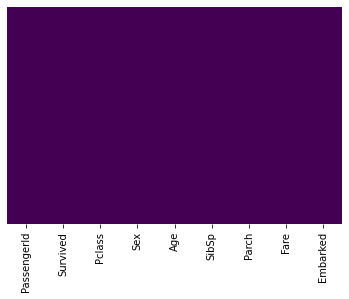

In [22]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [24]:
titanic_data = titanic_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
titanic_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


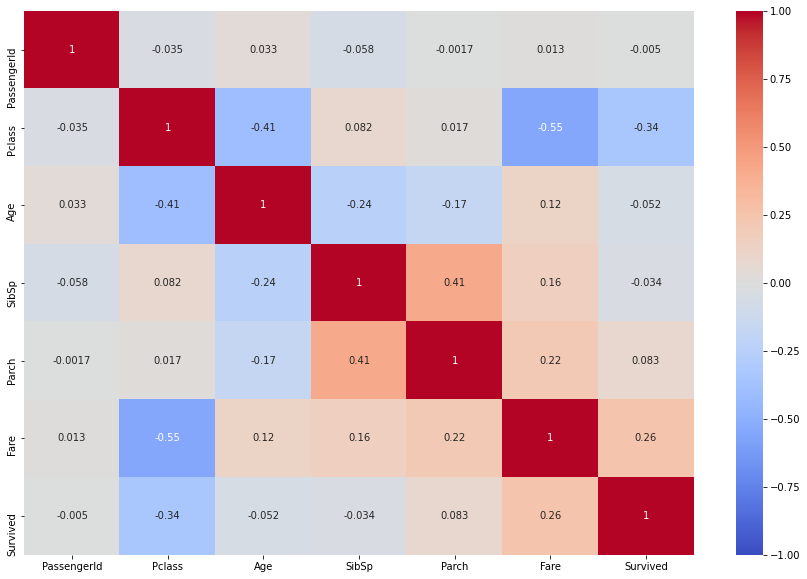

In [25]:
# Visualizing the correlation matrix
plt.figure(figsize=(15,10))
mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(titanic_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            )
# plt.savefig('corr-matrix.png')
plt.show()

In [26]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
 8   Survived     889 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 109.5+ KB


In [0]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex' ,'Embarked'], drop_first=True)

In [28]:
titanic_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,1


In [29]:
titanic_data.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Survived         int64
Sex_male         uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [30]:
titanic_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,2.311586,29.019314,0.524184,0.382452,32.096681,0.382452,0.649044,0.086614,0.724409
std,256.998173,0.834700,13.209814,1.103705,0.806761,49.697504,0.486260,0.477538,0.281427,0.447063
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,668.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [0]:
X = titanic_data.drop(['Survived'], axis = 1)
y = titanic_data['Survived']

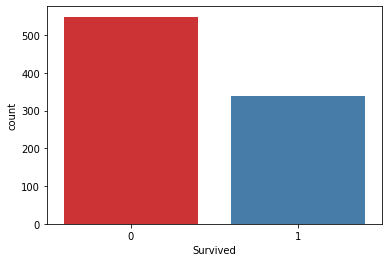

In [32]:
sns.countplot(y, palette='Set1')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [0]:
SEED=444
classifiersNames=['XGBClassifier','RandomForestClassifier','AdaBoostClassifier','KNeighborsClassifier', 'DecisionTreeClassifier', 'BaggingClassifier','VotingClassifier']

accuracyOnTrainDataOfAllClassifiers=[]
accuracyOnTestDataOfAllClassifiers=[]


In [36]:
  xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
  xgb_clf.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = xgb_clf.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Train accuracy of XGBClassifier",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = xgb_clf.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy XGBClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  XGBClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))

  clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
  clf_rf.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = clf_rf.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Train accuracy of RandomForestClassifier",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = clf_rf.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy RandomForestClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  RandomForestClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))

  clf_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
  clf_ab.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = clf_ab.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Train accuracy of AdaBoostClassifier",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = clf_ab.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy AdaBoostClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  AdaBoostClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))

  clf_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
  clf_knn.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = clf_knn.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Train accuracy of KNeighborsClassifier at k=5",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = clf_knn.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy KNeighborsClassifier at k=5",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  KNeighborsClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))


  clf_dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 7, min_samples_leaf = 5)
  clf_dt.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = clf_dt.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Train accuracy of  DecisionTreeClassifier",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = clf_dt.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy DecisionTreeClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  DecisionTreeClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))



  dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
  # Instantiate a BaggingClassifier 'bc'
  bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 
  # Fit 'bc' to the training set
  bc.fit(X_train, y_train)
  # Predict test set labels
  predictions = bc.predict(X_train)
  # Evaluate and print test-set accuracy
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy BaggingClassifier",np.round(accuracy*100, 2), '%')

  # Applying classifier on test (unseen) set
  predictions = bc.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy  BaggingClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  BaggingClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))




Train accuracy of XGBClassifier 83.28 %
Test accuracy XGBClassifier 84.27 %
Confusion matrix of  XGBClassifier
[[157   6]
 [ 36  68]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       163
           1       0.92      0.65      0.76       104

    accuracy                           0.84       267
   macro avg       0.87      0.81      0.82       267
weighted avg       0.85      0.84      0.84       267

Train accuracy of RandomForestClassifier 99.36 %
Test accuracy RandomForestClassifier 81.27 %
Confusion matrix of  RandomForestClassifier
[[144  19]
 [ 31  73]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       163
           1       0.79      0.70      0.74       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267

Train accuracy of AdaBoostClassifier 85.85 %
Test a

In [37]:
  #voting cassefier
  # Instantiate individual classifiers
  lr = LogisticRegression(random_state=SEED)
  xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
  clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)

  # Define a list called classifier that contains the tuples (classifier_name, classifier)
  classifiers = [('Logistic Regression', lr),
  ('XGB', xgb_clf),
  ('Random forest', clf_rf)]
  warnings.filterwarnings("ignore")
  for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
  vc = VotingClassifier(estimators=classifiers, voting='soft')
  # Fit 'vc' to the traing set and predict test set labels
  vc.fit(X_train, y_train)


  predictions = vc.predict(X_train)
  # Evaluate and print test-set accuracy
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy Voting classifier",np.round(accuracy*100, 2), '%')

  # Applying classifier on test (unseen) set
  predictions = vc.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfAllClassifiers.append(np.round(accuracy*100, 2))
  print("Test accuracy Voting classifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  Voting classifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))




Logistic Regression : 0.801
XGB : 0.843
Random forest : 0.813
Test accuracy Voting classifier 89.55 %
Test accuracy Voting classifier 84.27 %
Confusion matrix of  Voting classifier
[[154   9]
 [ 33  71]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       163
           1       0.89      0.68      0.77       104

    accuracy                           0.84       267
   macro avg       0.86      0.81      0.83       267
weighted avg       0.85      0.84      0.84       267



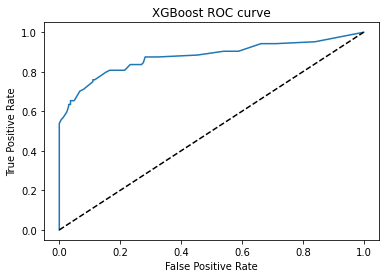

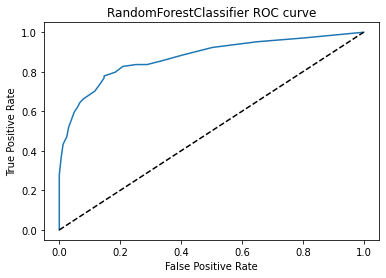

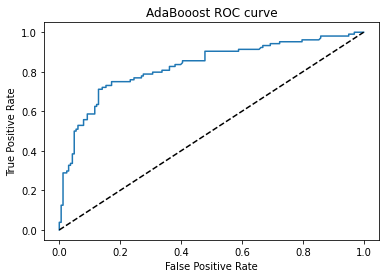

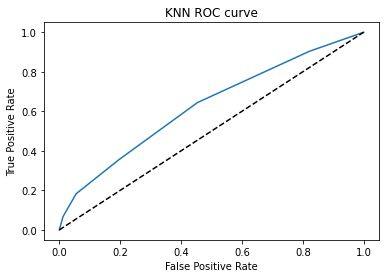

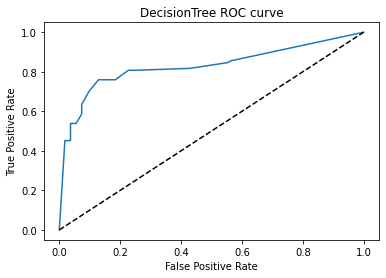

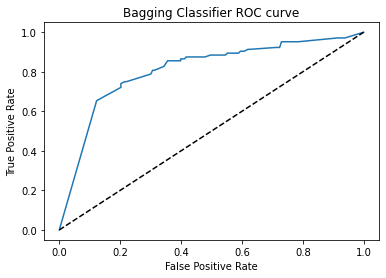

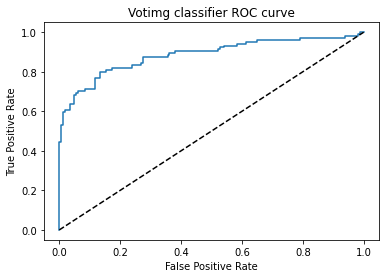

In [38]:
from sklearn.metrics import roc_curve  

probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

probs = clf_rf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC curve')
# show the plot
plt.show()

probs = clf_ab.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBooost ROC curve')
# show the plot
plt.show()

probs = clf_knn.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
# show the plot
plt.show()

probs = clf_dt.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTree ROC curve')
# show the plot
plt.show()


probs = bc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging Classifier ROC curve')
# show the plot
plt.show()

probs = vc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Votimg classifier ROC curve')
# show the plot
plt.show()

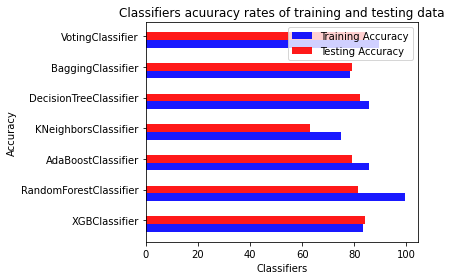

In [39]:
n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.9

rects1 = plt.barh(index, accuracyOnTrainDataOfAllClassifiers, bar_width,
alpha=opacity,
color='b',
label='Training Accuracy')

rects2 = plt.barh(index + bar_width, accuracyOnTestDataOfAllClassifiers, bar_width,
alpha=opacity,
color='r',
label='Testing Accuracy')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifiers acuuracy rates of training and testing data')
plt.yticks(index + bar_width, classifiersNames)
plt.legend()
plt.tight_layout()
plt.show()


In [0]:
df = pd.DataFrame({"Train":accuracyOnTrainDataOfAllClassifiers,
                  "Test":accuracyOnTestDataOfAllClassifiers,
                   "lables":classifiersNames})

In [41]:
df

,Train,Test,lables
0,83.28,84.27,XGBClassifier
1,99.36,81.27,RandomForestClassifier
2,85.85,79.03,AdaBoostClassifier
3,75.08,62.92,KNeighborsClassifier
4,85.85,82.40,DecisionTreeClassifier
5,78.46,79.03,BaggingClassifier
6,89.55,84.27,VotingClassifier


In [0]:
#sorting values based on Test accuracy to display
df_sorted= df.sort_values('Test')

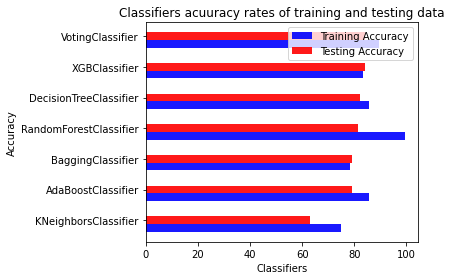

In [43]:
n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.9

rects1 = plt.barh(index, df_sorted.Train, bar_width,
alpha=opacity,
color='b',
label='Training Accuracy')

rects2 = plt.barh(index + bar_width, df_sorted.Test, bar_width,
alpha=opacity,
color='r',
label='Testing Accuracy')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifiers acuuracy rates of training and testing data')
plt.yticks(index + bar_width, df_sorted.lables)
plt.legend()
plt.tight_layout()
plt.show()



# **We can clearly see in ROC curve and bar plot,  Voting classifier performed well on titanic dataset**